# Catalogs & Plate solving

It is often required to match your detected stars with a catalog. Let's load an example image (from an archive like SDSS) and see how to do that

In [1]:
from prose.archive import sdss_image

INFO Querying https://archive.stsci.edu/cgi-bin/dss_form


<AxesSubplot:>

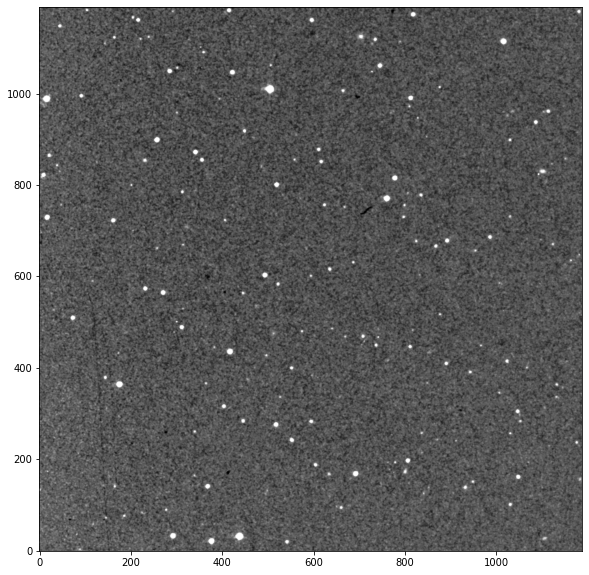

In [2]:
# an image of TRAPPIST-1 
image = sdss_image(("23 06 29.3684", "-05 02 29.0373"), (20, 20))
image.show()

In our case, the image is plate solved, we can check with

In [3]:
image.plate_solved

True

## Querying a catalog

To query a catalog we can use a catalog block from the `prose.blocks.catalogs` module

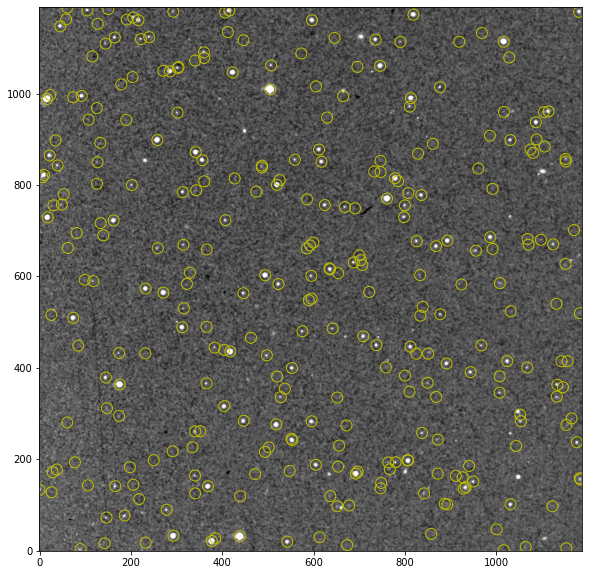

In [4]:
from prose.blocks import catalogs

image = catalogs.GaiaCatalog(mode="replace")(image)

# visualizing the catalog stars
image.show(stars=False)
image.plot_catalog("gaia")

An overlay with labels can be plotted with

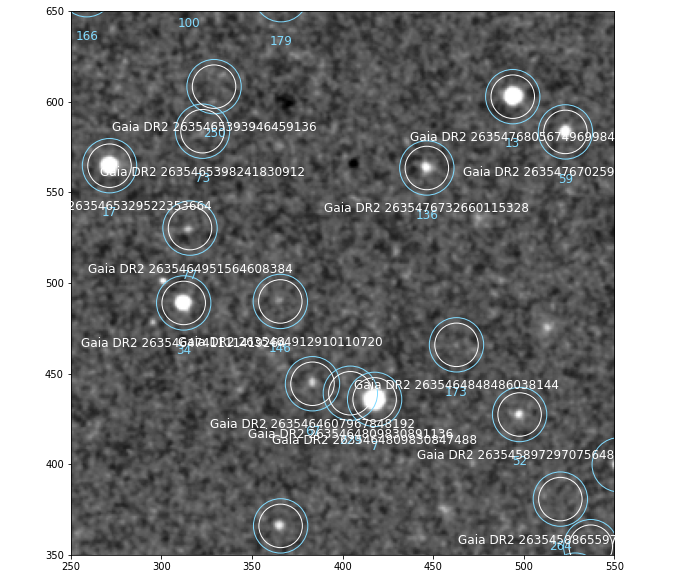

In [5]:
image.show_cutout(star=(400,500), size=300)
image.plot_catalog("gaia", label=True, color="w")

We see here that the `stars_coords` (plotted by default with `image.show_cutout`) are set to the queried stars

The full catalogs can be found at

In [6]:
image.catalogs["gaia"]

,index,solution_id,id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,x,y
0,3,1635721458409799680,Gaia DR2 2635480237353372160,2635480237353372160,1145454718,2015.5,346.646498,0.038742,-4.925421,0.032160,...,200111,1.664209,1.603750,1.729316,3.345175,3.252988,3.437362,https://gea.esac.esa.int/data-server/datalink/...,505.175805,1009.615838
1,5,1635721458409799680,Gaia DR2 2635456945746189696,2635456945746189696,817258039,2015.5,346.666253,0.037022,-5.199083,0.039163,...,200111,1.103787,0.998070,1.129748,1.315697,1.285068,1.346326,https://gea.esac.esa.int/data-server/datalink/...,438.452400,31.418957
2,6,1635721458409799680,Gaia DR2 2635479550158605056,2635479550158605056,132373045,2015.5,346.784044,0.044148,-4.930801,0.048522,...,200111,2.737030,2.628122,2.930485,3.735508,3.536159,3.934858,https://gea.esac.esa.int/data-server/datalink/...,16.542186,988.603203
3,9,1635721458409799680,Gaia DR2 2635478076985292160,2635478076985292160,1431076968,2015.5,346.574810,0.026821,-4.992565,0.019001,...,200111,6.997863,6.758047,7.126602,27.008816,22.342409,31.675222,https://gea.esac.esa.int/data-server/datalink/...,760.686001,770.568960
4,15,1635721458409799680,Gaia DR2 2635463852053602176,2635463852053602176,1437357409,2015.5,346.739864,0.025791,-5.105819,0.025741,...,200111,1.229900,1.099773,1.576203,1.411291,1.334785,1.487797,https://gea.esac.esa.int/data-server/datalink/...,175.786311,363.737573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,535,1635721458409799680,Gaia DR2 2635481165066395776,2635481165066395776,1069485838,2015.5,346.578783,1.212314,-4.969499,1.012364,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,746.294694,852.943247
298,544,1635721458409799680,Gaia DR2 2635457525566337664,2635457525566337664,949993158,2015.5,346.719172,1.193311,-5.152310,1.296831,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,249.894255,197.870557
299,554,1635721458409799680,Gaia DR2 2635479618878183680,2635479618878183680,688393043,2015.5,346.753414,1.898055,-4.936480,2.364617,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,125.443276,968.715832
300,566,1635721458409799680,Gaia DR2 2635467111934793088,2635467111934793088,515167063,2015.5,346.774041,1.456007,-4.989243,1.606014,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,52.846621,779.881605


## Plate solving

To plate solve an image we can use the following sequence

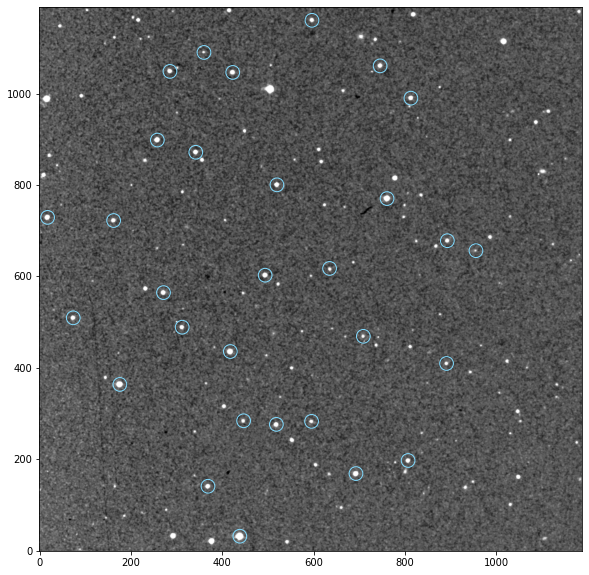

In [7]:
from prose import Sequence, blocks

plate = Sequence([
    blocks.detection.SegmentedPeaks(min_separation=15, n_stars=15),
    blocks.catalogs.PlateSolve(debug=True)
])

plate.run(image, show_progress=False)

Seeing the markers on the stars (only with `debug=True`) in the image shows that the plate solving was successful